In [19]:
!pip install --upgrade git+https://bitbucket.org/freemens/ion_sdk.git@master    
%env ALTERGO_FACTORY_API = https://staging.altergo.io/
%env ALTERGO_IOT_API = https://iot.staging.altergo.io/   

  Cloning https://bitbucket.org/freemens/ion_sdk.git (to revision master) to c:\users\gcoll\appdata\local\temp\pip-req-build-y7q8elmq
env: ALTERGO_FACTORY_API=https://staging.altergo.io/
env: ALTERGO_IOT_API=https://iot.staging.altergo.io/


  Running command git clone -q https://bitbucket.org/freemens/ion_sdk.git 'C:\Users\gcoll\AppData\Local\Temp\pip-req-build-y7q8elmq'


In [3]:
import pandas as pd
data = pd.read_csv('price.csv')
import matplotlib.pyplot as plt
import ion_sdk.edison_api.edison_api as eapi
import datetime
from ion_sdk.edison_api.models.factoryModel import EdisonGenericComponent, Model,CurrentState
from datetime import timedelta
edApi=eapi.Client("f6ad4f7166814976b66b9cb346ebc5dd")


In [4]:
values = [90.00,
        50.20,
        50.00,
        63.00,
        50.00,
        73.70,
        120.00,
        170.49,
        212.95,
        189.00,
        260.00,
        110.02,
        231.00,
        210.00,
        220.00,
        172.00,
        50.80,
        190.00,
        230.07,
        261.00,
        191.00,
        110.00,
        171.00,
        200.80]


In [5]:
startDate = datetime.datetime(2020,1,1,00,00,00)

list = []
currentDate = startDate
for i in range(365):
    for j in range (24):
        list.append([currentDate,values[j]])
        currentDate = currentDate + timedelta(hours=1)
    

        
data = pd.DataFrame(list, columns =['date', 'price'])
print(data)

                    date  price
0    2020-01-01 00:00:00   90.0
1    2020-01-01 01:00:00   50.2
2    2020-01-01 02:00:00   50.0
3    2020-01-01 03:00:00   63.0
4    2020-01-01 04:00:00   50.0
...                  ...    ...
8755 2020-12-30 19:00:00  261.0
8756 2020-12-30 20:00:00  191.0
8757 2020-12-30 21:00:00  110.0
8758 2020-12-30 22:00:00  171.0
8759 2020-12-30 23:00:00  200.8

[8760 rows x 2 columns]


In [6]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data=data.set_index('date')

In [7]:
print(data)

                     price
date                      
2020-01-01 00:00:00   90.0
2020-01-01 01:00:00   50.2
2020-01-01 02:00:00   50.0
2020-01-01 03:00:00   63.0
2020-01-01 04:00:00   50.0
...                    ...
2020-12-30 19:00:00  261.0
2020-12-30 20:00:00  191.0
2020-12-30 21:00:00  110.0
2020-12-30 22:00:00  171.0
2020-12-30 23:00:00  200.8

[8760 rows x 1 columns]


In [8]:
serial = "ET-1"
asset=edApi.getAsset(serial)
print(asset)

EdisonComponent(id=332, serial_number='ET-1', iot_data=IotData(id=268, last_update=Datetime(date=datetime.datetime(2021, 10, 15, 0, 0), timezone_type=3, timezone='UTC'), shadow='{"totalCount":193,"needRefresh":false,"refreshObj":[],"_id":"617a71ced2c432001c8679ae","sensorStatistics":[{"_id":"617a71ced2c432001c8679af","componentId":332,"sensorId":24,"sensorCode":"eBY","sensorPosition":"0","lastUpdate":1634256000000,"lastValue":90,"firstUpdate":1633564800000,"firstValue":90,"count":193,"createdAt":"2021-10-28T09:47:58.804Z","updatedAt":"2021-10-28T09:47:58.804Z"}],"componentId":332,"serialNumber":"ET-1","lastUpdate":1634256000000,"firstUpdate":1633564800000,"createdAt":"2021-10-28T09:47:58.804Z","updatedAt":"2021-10-28T09:47:58.804Z"}', latitude=None, longitude=None), model=Model(id=24, name='Energy trader', is_configurable=False, configuration_type=None, view_template=None, category=Category(id=2, name='Battery'), image=Image(id=14, name=None, file='d6a23423412dfa9208e557db46598932.jpeg

In [9]:
uploadSensorList = edApi.refactorDataframeToAsset(data,asset)
asset.df=data
print(uploadSensorList)
edApi.updateSensorDataByFile(asset,uploadSensorList)

('Price', 100)
['Price']

Preparing payload
Payload sent successfully! Checkout: https://staging.altergo.io/core/iot/connected_component/view/332/graph


In [10]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='date'>

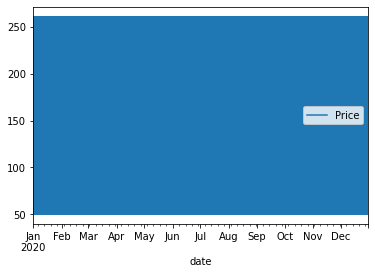

In [11]:
data.plot()